<a href="https://colab.research.google.com/github/WatanabeYohei/Programming/blob/IIM2024/Programming%EF%BC%95%E7%AB%A0%EF%BC%97%E7%AF%8020240826.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ５章６節　Ｃによる数理処理

　コンピュータを利用することで，人間にとってはむずかしいぼう大な情報の処理や複雑な計算を，正確かつ高速に行うことが可能になる。この節では，C による数理処理について学ぶ。


pp.166-168
# １　モンテカルロ法による円周率πの近似値計算
　円周率πとは，円の直径に対する円周の長さの比率を示すもので，3.141 59……の値となる。また，乱数を用いたシミュレーションを行うことで近似値を求める方法の一つにモンテカルロ法
がある。ここでは，モンテカルロ法を用いて，円周率πの近似値を導き出す。
　まず，図12（a）に示すように，半径が1 である円とそれに外接する正方形を描く。ここから，図12（b）に示すようにA の部分を抜き取った4 分円を使って考える。

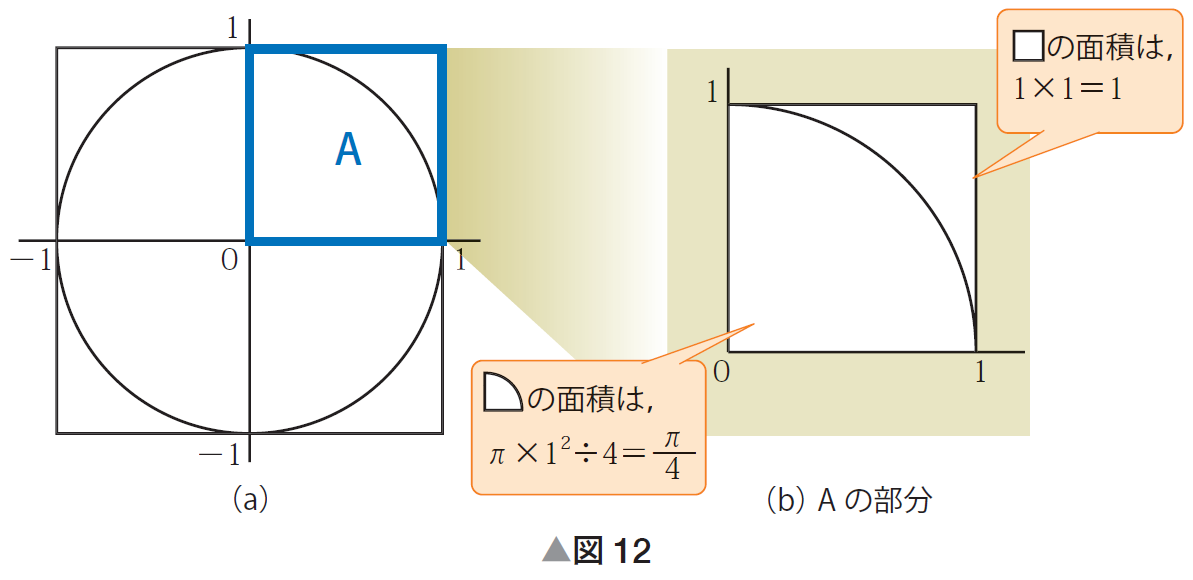

　図12（b）の正方形の面積は1 × 1 ＝ 1 となり， 4 分円の面積はπ× 12 ÷ 4 ＝ $\frac{π}{4}$となる。次に，図12（b）の長さ1 の正方形内の任意の場所に点を打つ。図13（a）に示すように，4 分円の内側にある場合は赤色の点を，4 分円の外側にある場合は青色の点を打つ。点を打つ数を増やしていくと，図13（b）のようになる。

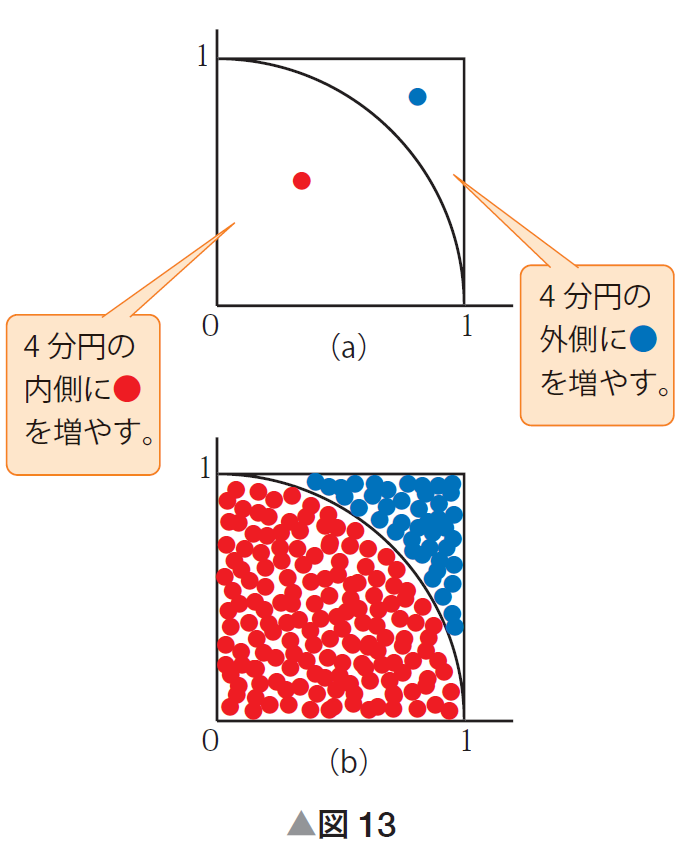


　このことから，図形の面積比とその図形の内部に含まれる点の個数の比は近似していると考えることができる。
　この関係を式で表すと

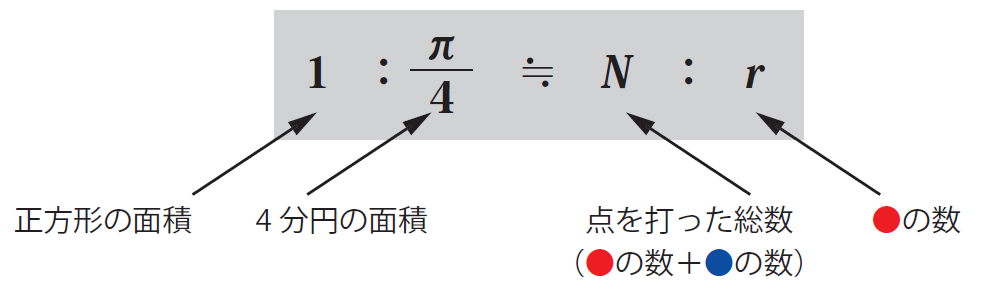

となり，これより円周率πは

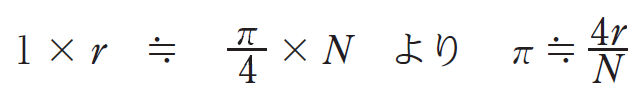

として求めることができる。
　また，点の場所が4 分円の内側に含まれるかどうかの判断は，三平方の定理を使って考えればよい。図14 より，左下にある原点と点（x，y）との距離をd とすると，

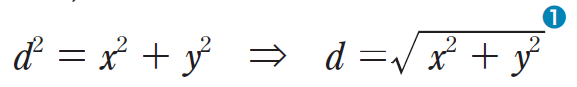

となる。半径の大きさが1のため，点を打つ場所であるd が1 より小さい値ならば，4 分円の内側にあると判断することができる。

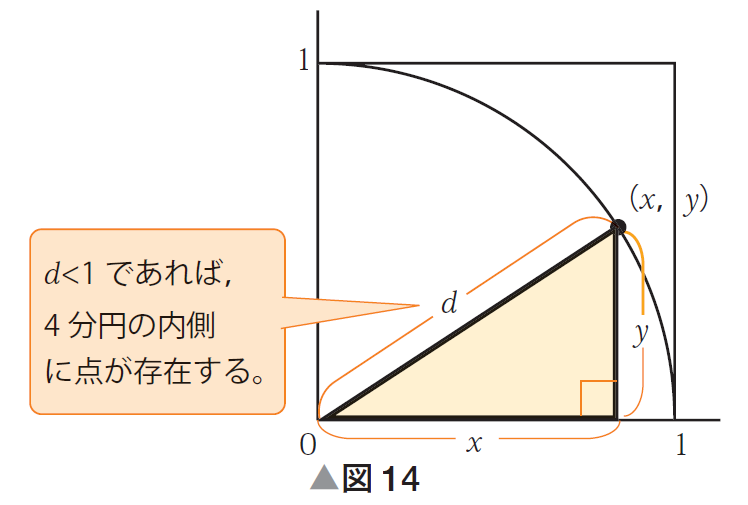

---

例題19

モンテカルロ法を用いて円周率πの近似値を求めるプログラムをつくりなさい。

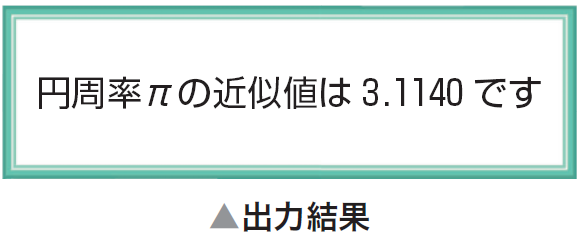

考え方

乱数を発生させるrand 関数を用いて，x 軸とy 軸に点を打つ場所を決定する。次に，三平方の定理を使って，この点が円の内側にあるかどうかの判断を行う。この結果をもとに円周率πの近似値を求める。

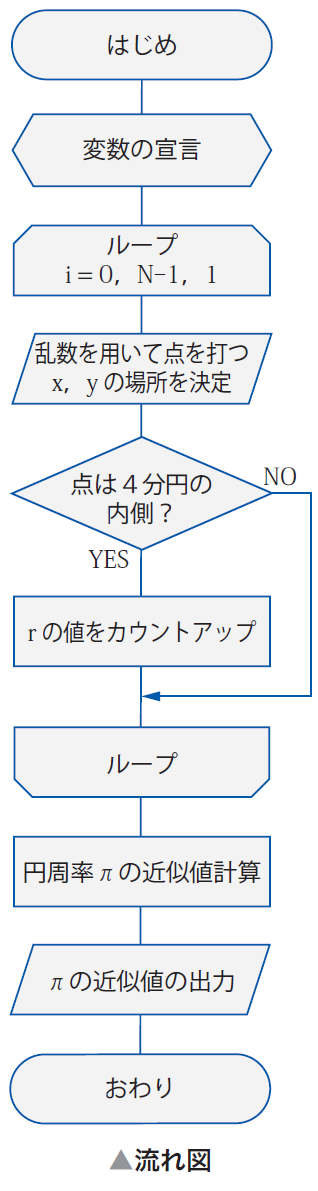

```
01 /* 例題19 */
02 #include<stdio.h>
03 #include<stdlib.h>
04 #define N 10000
05 int main(void)
06 {
07     int i;
08     double pi,x,y,r = 0.0;
09     for(i = 0; i < N; i++){
10         x =(double)rand() / (RAND_MAX);
11         y =(double)rand() / (RAND_MAX);
12         if((x * x + y * y)<1.0) {
13             r++;
14         }
15     }
16     pi = (r / N)*4.0;
17     printf("円周率πの近似値は %.4f です ￥n",pi);
18     return 0;
19 }
```
解説

行03　乱数を発生させる関数「rand()」を利用するために取り込むヘッダファイルを指定する。

行04 #define 指令により点を打つ数を定義する。

行10，11 rand()を呼び出すと0 ～ 32767 の乱数が生成される。RAND_MAX はあらかじめ定義されている定数で，32767 である。これらの除算により，0 ～ 1.0 の範囲の実数値である乱数が生成される。

行12　打つ点の場所が半径1 の円の内側にあるか判断を行う。

行16　点の総数N と4 分円の内側にある赤色の点r の数の関係より，円周率πの近似値を求める。

　行04 にある点を打つ数N の値を変化させて，実行した結果の例を示す。

N ＝ 1 000 ⇒　円周率πの近似値は3.1120 です

N ＝ 10 000 ⇒　円周率πの近似値は3.1140 です

N ＝ 100 000 ⇒　円周率πの近似値は3.1374 です




In [ ]:
%%file rei19.c
// 例題19の内容を入力してみましょう。

In [ ]:
//Ｃファイルの作成（上書き）ができたら、コンパイルして実行してみよう。
!gcc rei19.c -o rei19 && ./rei19

練習問題19

例題19 のプログラムにおいて，N の値をさらに増やすと円周率πの近似値がどのように変化するか確かめなさい。

※自分でコード欄を追加して実行してみよう。

%%file ren19.c

!gcc ren19.c -o ren19 && ./ren19

pp.169-173
# ２　ファイル処理

　実験などで使用する計測機器のなかには，測定した温度や電圧などのデータをファイルに保存できる機能をもつものがある（図15）。これらのデータをコンピュータに取り込むことで，高速かつ効率的な処理が可能になる。ここでは，C によるファイル処理について学ぶ。

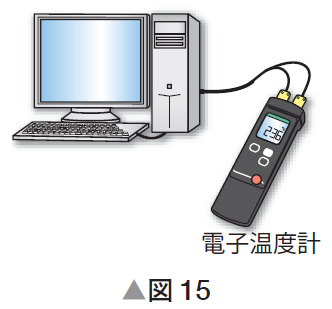

---
１　ファイルの種類と特徴

コンピュータをはじめとする情報機器の内部には，プログラムやデータが記録されている。これらは，ファイルという単位で扱われ，図16 に示すように，プログラムファイル，データファイルなどとよばれている。

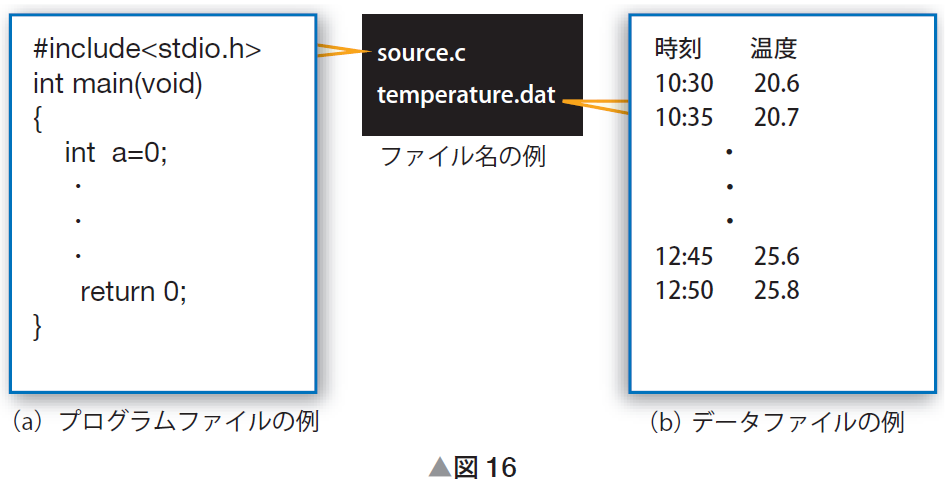

　ファイルは，データの種類によってテキストファイルとバイナリファイルに分けることができる。

テキストファイルは，内容が文字列からできているもので，キーボードから入力した文字をファイルに書き込んだり，ファイルの内容を
読み取ったりする処理ができる。

　バイナリファイルは，ファイルを扱うソフトウェアに応じたコードや数値をファイルにしたもので，一般にはファイルの内容をそのまま出力することはできない。

---

２　基本的なファイル処理プログラム

Ⓐ　テキストファイルへのデータの書込み

ここでは，ファイルにデータを書き込むプログラムについて学ぶ。

---

例題20

図17 に示すかけ算九九の各段のデータを，データファイル「kuku.txt」に書き込むプログラムをつくりなさい。

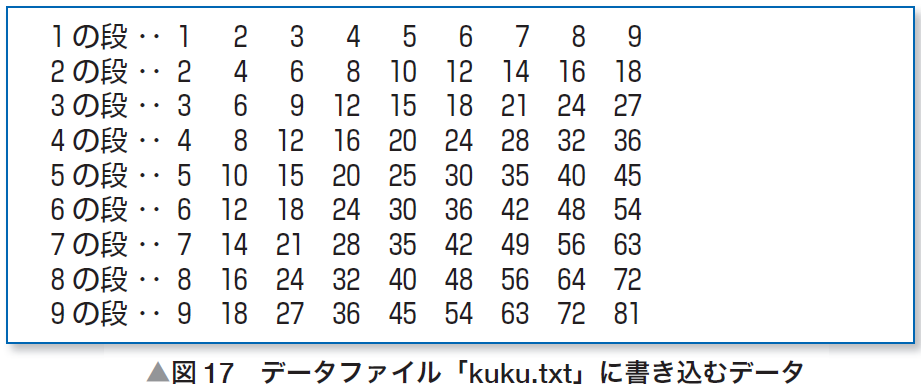

考え方

ファイルの書込み手順は，次の①～④のようになる。

①ファイルポインタの宣言：ファイルを使用するさいは，ファイルのデータを読み書きするときの現在位置を示すファイルポインタを宣言する。

②ファイルのオープン：fopen 関数を用いてファイルをオープンする。

③データの書込み：fprintf 関数を用いてデータの書込みを行う。

④ファイルのクローズ：ファイル処理では，プログラムを終了するまえに必ずfclose 関数によってファイルをクローズする。

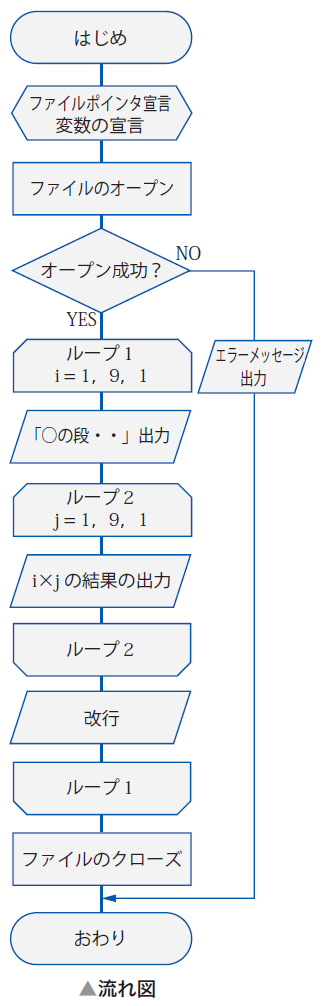

```
01 /* 例題20 */
02 #include<stdio.h>
03 #include<stdlib.h>
04 int main(void)
05 {
06     FILE *fp;
07     int i, j;
08     if ((fp = fopen("kuku.txt", "w")) == NULL) {
09         printf(" ファイルをオープンできません。¥n");
10         exit(1);
11     }
12     for(i = 1; i <= 9; i++){
13         fprintf(fp, "%d の段・・", i);
14         for(j = 1; j <= 9; j++){
15             fprintf(fp, " %2d ",i*j);
16         }
17         fprintf(fp, "¥n");
18     }
19     fclose(fp);
20     return 0;
21 }
```

解説

行03　行10 で使用しているexit 関数が格納されているヘッダファイルstdlib.hを取り込んでいる。

行06　ファイルポインタfp を宣言している。

行08 kuku.txt という名前のファイルを書込みモード（w）でオープンしている。

行09～10　ファイルをオープンできなかったときのエラー処理を行う。

行14～16　各段の九九の値をファイルに書き込むループである。

行17　各段の結果を出力するごとに改行している。

行19～21　ファイルをクローズし，プログラムを終了する。

---
（基礎知識）

Ａ　ファイルのオープンとクローズ：ファイルを使用するさいのファイルポインタの宣言の書式は，次のようになる。

```
FILE * ファイルポインタ名;
```

　ファイルを作成したり，読取りを行ったりする場合には，ファイルをオープンする処理を行う必要があり，書式は次のようになる。

```
ファイルポインタ名 = fopen("ファイル名"," モード");
```

　モードには，読取りモードr，書込みモードw，追加モードaがある。C では，指定したファイルがオープンできない場合でもエラーメッセージが表示されない。このため，ファイルがオープンできなかったときのエラー処理を次のようなプログラムで行う。

```
if ((fp = fopen("kuku.txt", "w")) = = NULL) {
    printf(" ファイルをオープンできません。¥n");
    exit(1);
}
```

これは，ファイルがオープンできなかったさいにfopen 関数がNULLを返すことを利用している。exit(1) は，そのときの処理を終了する関数である。

　ファイル操作の終わりには，ファイルをクローズする処理を行う。

```
fclose( ファイルポインタ名);
```

---
Ｂ　ファイルへの書込み：データをファイルに書き込むには，fprintf 関数が使用できる。この関数の書式は，次のようになる。

```
fprintf( ファイルポインタ名，" 書式文字列"，配列名１，配列名２，… );
```
---

練習問題20

 図18 に示すある時間帯の温度を計測したデータをファイル[TempData.txt] に書き込むプログラムをつくりなさい。

 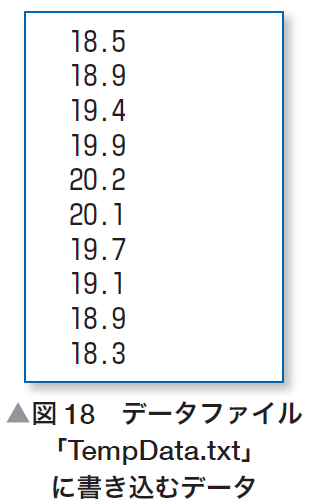

※自分でコード欄を追加して実行してみよう。

%%file ren20.c

!gcc ren20.c -o ren20 && ./ren20

Ⓑテキストファイルからのデータの読取り

　ここでは，データが書き込まれているファイルをコンピュータで読み取って処理を行うプログラムについて学ぶ。

---

例題21

練習問題20 で作成したデータファイル「TempData.txt」の内容をコンピュータに読み取って，平均温度を求めて画面に出力するプログラムをつくりなさい。

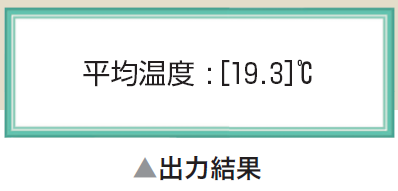

考え方

　ファイルの書込みと同様に，ファイルポインタを宣言したあと，ファイルをオープンしてデータの読取り処理を行う。ファイルの使用を終えたら，ファイルをクローズしてプログラムを終了する。

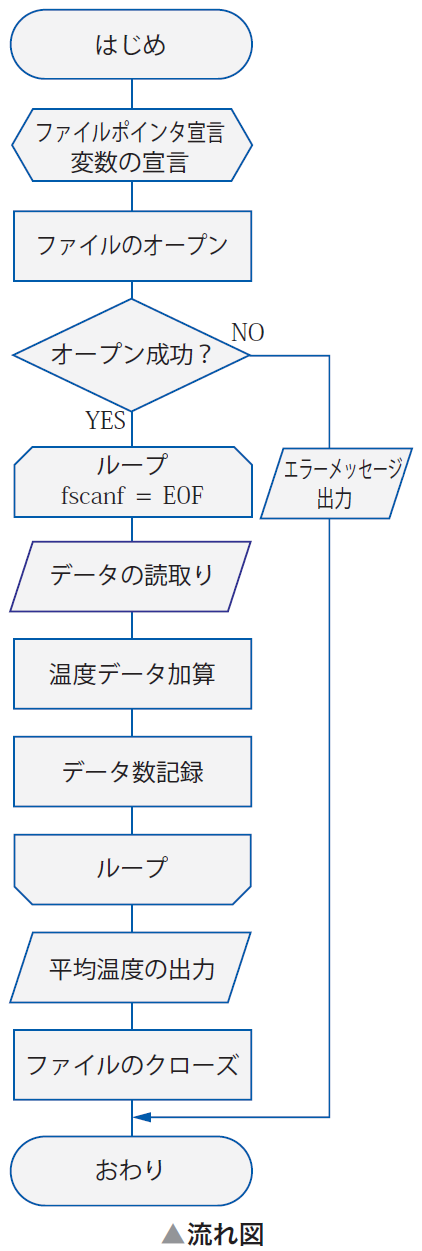


```
01 /* 例題21 */
02 #include<stdio.h>
03 #include<stdlib.h>
04 int main(void)
05 {
06     FILE *fp;
07     double data[10]={0},sum=0;
08     int num = 0;
09     if ((fp = fopen("TempData.txt", "r")) == NULL) {
10         printf(" ファイルをオープンできません。¥n");
11         exit(1);
12     }
13     while(fscanf(fp,"%lf",&data[num]) != EOF){
14         sum += data[num];
15         num++;
16     }
17     printf(" 平均温度：[%.1f]℃ ¥n", sum / num);
18     fclose(fp);
19     return 0;
20 }
```

解説

行06　ファイルポインタfp を宣言している。

行07　ファイルから読み取ったデータを格納する配列を宣言している。{0} は初期値として，すべての配列要素に0 を代入することを意味する。

行09 TempData.txt という名前のファイルを読取りモード（r）でオープンしている。

行10～11　ファイルをオープンできなかったときのエラー処理。

行13～16　ファイルに格納されている分だけデータを読み取り，配列に格納する。読み取ったデータを配列に格納しながら，変数sum に合計していく。また，取得したデータ数を変数num で記録する。

行17　温度データを合計したsum をデータ数num で割ることにより，平均温度を求めて出力する。

行18～19　ファイルをクローズし，プログラムを終了する。

In [ ]:
%%file rei21.c
// 例題21の内容を入力してみましょう。

In [ ]:
//Ｃファイルの作成（上書き）ができたら、コンパイルして実行してみよう。
!gcc rei21.c -o rei21 && ./rei21

（基礎知識）

Ａ　ファイルからの読取り：ファイルからデータを読み取るには，fscanf 関数が使用できる。この関数の書式は次のようになる。

```
fscanf( ファイルポインタ名， " 書式文字列"，配列名１，…);
```

---

練習問題21

1⃣　例題20 およびp.152 例題11 のプログラムを参考にしながら，図19 に示すように＊を使って作成した三角形をファイル「triangle.txt」に書き込むプログラムをつくりなさい。（ren21_1）

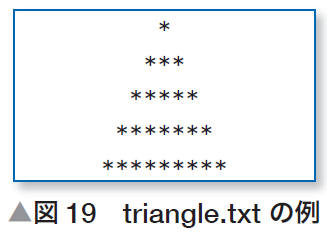

2⃣　例題21 で使用したプログラムに，最高温度および最低温度を求めて出力する機能を追加しなさい。（ren21_2）

※自分でコード欄を追加して実行してみよう。

%%file ren21_1.c

!gcc ren21_1.c -o ren21_1 && ./ren21_1